In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

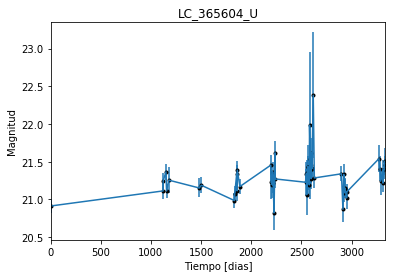

In [2]:
data = np.genfromtxt('LC_365604_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_365604_U')
plt.savefig("LC_365604_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

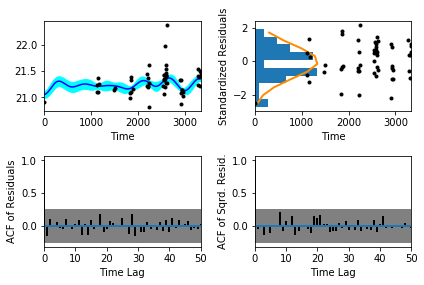

In [5]:
sample.assess_fit()

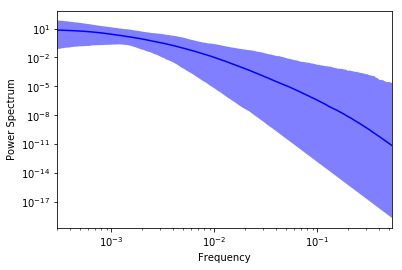

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

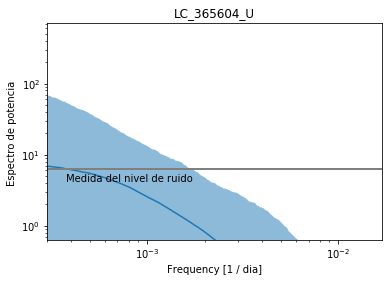

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_365604_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_365604_U')

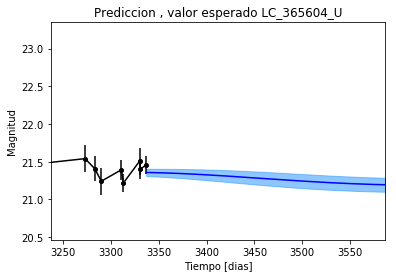

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_365604_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_365604_U')

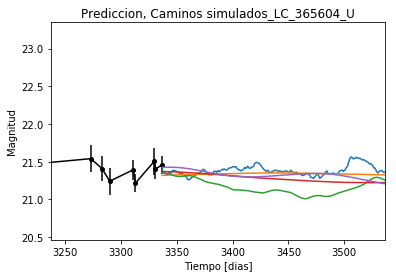

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_365604_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


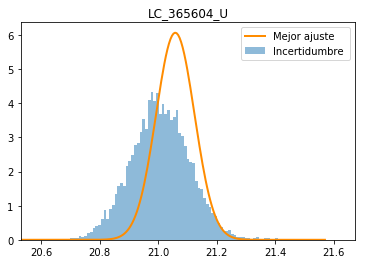

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_365604_U')
plt.savefig("Mejor_ajuste_LC_365604_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_365604_U')

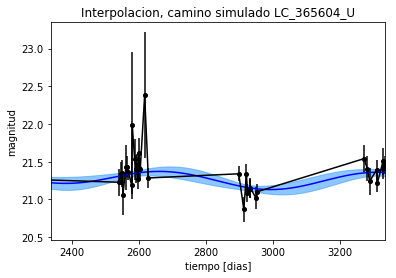

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_U')

Text(0.5,1,'Interpolacion, camino simulado LC_365604_U')

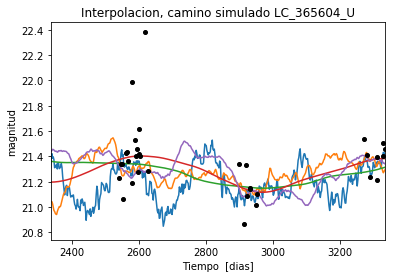

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1137.38122651
Median: 0.00744355324932
Standard deviation: 0.19697376995
68% credibility interval: [ 0.00073154  0.14319281]
95% credibility interval: [  3.46502798e-04   8.20955062e-01]
99% credibility interval: [  3.09450871e-04   1.01537165e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 653.975002454
Median: 0.00197412903852
Standard deviation: 0.0871417907053
68% credibility interval: [ 0.00048208  0.02508948]
95% credibility interval: [ 0.00032404  0.25474738]
99% credibility interval: [  3.07183381e-04   6.52810500e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 866.300326879
Median: 0.0300722868134
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1677.53000927
Median: 44.0774247414
Standard deviation: 1.46747068059
68% credibility interval: [ 42.43733606  45.04959117]
95% credibility interval: [ 39.94293636  45.57544175]
99% credibility interval: [ 38.09843403  45.8465779 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 568.630868939
Median: 0.724813570502
Standard deviation: 2.2941532538
68% credibility interval: [ 0.06345895  4.05401279]
95% credibility interval: [ 0.01514166  7.46372284]
99% credibility interval: [  1.01403925e-02   1.15511261e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 432.107654849
Median: 0.393662105617
Standard deviation: 10.2502597893
68% credibility interval: [ 0.01889087  7.35255856]
95% credibility interval: [  7.39

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 9607.15266305
Median: 1.37396051599e-53
Standard deviation: 6.76905452873e+147
68% credibility interval: [  2.16966779e-79   4.07273570e-11]
95% credibility interval: [  2.22472111e-121   5.83103827e+132]
99% credibility interval: [  3.45495723e-129   3.08660922e+147]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1696.7282746
Median: 21.2188647593
Standard deviation: 0.0820686571521
68% credibility interval: [ 21.14230475  21.27396463]
95% credibility interval: [ 21.03104637  21.35579041]
99% credibility interval: [ 20.91909067  21.44941528]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 283.041616034
Median: 0.0139688588807
Standard deviation: 0.246954806697
68% credibility interval: [ 0.          0.31161982]
95% credibility interval: [ 0.          0.92571108]
99% credibility interval: [ 0.          1.04213188]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 283.041616034
Median: 0.0139688588807
Standard deviation: 0.246954806697
68% credibility interval: [ 0.          0.31161982]
95% credibility interval: [ 0.          0.92571108]
99% credibility interval: [ 0.          1.04213188]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 693.908090093
Median: 0.0
Standard deviation: 0.0148302019487
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1677.53000927
Median: 44.0774247414
Standard deviation: 1.46747068059
68% credibility interval: [ 42.43733606  45.04959117]
95% credibility interval: [ 39.94293636  45.57544175]
99% credibility interval: [ 38.09843403  45.8465779 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2188.88575808
Median: 0.0211819087236
Standard deviation: 0.0344239733802
68% credibility interval: [ 0.01055547  0.04600282]
95% credibility interval: [ 0.00546194  0.11184233]
99% credibility interval: [ 0.00299906  0.21380731]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2390.10731135
Median: 0.993321362964
Standard deviation: 0.153456826627
68% credibility interval: [ 0.86421826  1.15543902]
95% credibility interval: [ 0.74727645  1.34994731]
99% credibility interval: [ 0.68012065  1.51380645]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1779.7860459
Median: 0.000138178932672
Standard deviation: 0.342241871762
68% credibility interval: [  3.75540826e-07   1.08993575e-02]
95% credibility interval: [  1.42273254e-135   5.03815663e-001]
99% credibility interval: [  3.37009437e-152   2.04509085e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1137.38122651
Median: (-0.0467692244093-2.09362548896j)
Standard deviation: 1.98478397462
68% credibility interval: [-0.89970695-0.50405068j -0.00459638-1.65772189j]
95% credibility interval: [ -5.15821279e+00+0.j          -2.17714129e-03-0.35262508j]
99% credibility interval: [ -6.37976824e+00-5.6197584j  -1.94433717e-03-0.857349j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 653.975002455
Median: (-0.0124038185693+0.341076704543j)
Standard deviation: 1.64543137711
68% credibility interval: [-0.15764183+0.j         -0.00302902+0.29845584j]
95% credibility interval: [-1.60062503+4.8669819j  -0.00203603+0.01051867j]
99% credibility interval: [ -4.10172934e+00+0.j          -1.93009011e-03+0.88153479j]
Posterior summa